In [1]:
# Imports:
import pandas as pd

from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

# Load and preview DataFrame
df = pd.read_csv('../Final-Project/20190313_TW_Migrant-Migration.csv')
df.head(2)

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1.102720e+18,darleneclarke5,"RT @ezralevant: Abdul Habash, a Syrian migrant...",Mon Mar 04 23:59:47 +0000 2019,04/03/2019 23:59:47,NaN,en,NaN,NaN,5.642576e+08,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://abs.twimg.com/sticky/default_profile_im...,197,579.0,NaN,http://twitter.com/darleneclarke5/statuses/110...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1.102720e+18,BlueelvisEric,RT @1776Stonewall: https://t.co/CyucESMlFM Te...,Mon Mar 04 23:59:40 +0000 2019,04/03/2019 23:59:40,NaN,en,NaN,NaN,3.109106e+09,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1062099415...,940,225.0,top your momma,http://twitter.com/BlueelvisEric/statuses/1102...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


# Section 1:
Note: Completed as a team (with Alayne)

- Our dataset includes 123,524 tweets containing the terms "migrant" or "migration" along with associated metadata, collected from the period January 21 to March 4, 2019.
- The data were collected via the Twitter Archiving Google Sheet (TAGS), which interfaces with the Twitter search API. Note that the Twitter search API does not provide all tweets matching the search criteria for the given time period and may reflect some biases. For example, González-Bailón et al., 2014 report that the Twitter search API over-represents central users and under-represents peripheral activity.
- For each observation (i.e, tweet), data is provided on 15 variables: 9 that provide information about the author of the tweet and 6 that provide information about the tweet:
    - In addition to the text of the tweet, the variables indicate tweet ID, tweet time and date, tweet components (e.g., hashtags, user mentions, links), tweet URL, tweet method (e.g., HTML indicating whether author tweeted via web app, phone, Facebook), tweet geographical coordinates (if available), author screen name and ID, author location (from profile), author follower count (users following the author), author friend count (users the author follows), author profile picture (URL), ID of the original author (if tweet is a reply) and ID of the original tweet (if tweet is a reply).
- Variables to be constructed include sentiment score for the tweet and other metrics derived from text of the tweets, which contain in total 2,351,687 word tokens. The tweet corpus will require processing and cleaning. For example, a few variables will be dropped because of missing or duplicate data and several of the categorical variables will be recoded into fewer levels. Much of this work has been done, with summary statistics and early text analyses are available at https://github.com/menyalas/llcu612Project.
- Remaining challenges include recoding author location data, stripping time information from the date/time variable, comparing author language to the language of the tweet itself. The most imporant challenge of course is to be able to reliably calculate sentiment score.
- If time permits, we could also possibly add a network measure (mention network or retweet network).
- As a brief overview, the language of the tweets and their authors is by and large English and the country of residence of majority authors is the United States. The 123,524 tweets emanate from 88,304 unique authors, include 97,185 retweets and refer to 10,729 unique hashtags. About 60% of all tweets are issued via a smartphone.

*References*:
González-Bailón et al. (2014)Assessing the bias in samples of large online networks. Social Networks, 38. Retrieved March 25, 2019 at https://doi.org/10.1016/j.socnet.2014.01.004

# Section 2:

- For this section, I first write all of the tweets in our dataset to a .txt. Then, I uploaded it to Voyant.

In [2]:
with open('./tweets_text.txt', 'w') as f:
    for tweet in df['text'].tolist(): # loop through all the tweets
        f.write(tweet) # write to txt
        f.write('\n')

In [3]:
from IPython.display import IFrame
IFrame('//voyant-tools.org/tool/CollocatesGraph/?stopList=keywords-c9ca6955f1b8688e84744b153908b15f&query=migrant&query=migration&query=border&mode=corpus&corpus=1a52cb2a7564573e7811be2fcab33171', width=300, height=300)

### Comments:
- Here, I've embedded the Links tool and the corpus includes all the tweets present in our extracted dataset.
- Links tool shows the Collocates Graph which represents - as a network - pairs of words that occur in close proximity to each other.
- We can see some interesting edges here that we would expect. For example 'border' is connected with 'patrol' and 'agents'; 'migrant' has collocated such as 'thousands', 'families', 'caravan' etc. And 'migration' with 'crisis', 'eu' etc.
- Since the dataset was collected from Twitter using the keyword search on <i>migrant</i> and <i>migration</i>, this default Collocates Graph is very intuitive and gives us the context in which the Twitter users talk about certain topics.


# Section 3:

In [4]:
# Generate term frequency graph from the tweet text:
tweets = df['text'].tolist()
print("There are", len(tweets), "tweets.")

There are 123524 tweets.


In [5]:
# Load stopwords for four languages:
languages = ['english', 'french', 'german', 'spanish']

STOPWORDS = []
for lang in languages:
    STOPWORDS.extend(stopwords.words(lang))

# Add some custom stopwords:
custom_stopwords = ["amp", "n't", "rt"]

STOPWORDS.extend(custom_stopwords)
print("4 languages + custom stopwords, we have a total of {} stopwords.".format(len(STOPWORDS)))

4 languages + custom stopwords, we have a total of 855 stopwords.


In [6]:
all_words = [] # list to store all the words in our corpus

for tweet in tweets:
    words = word_tokenize(tweet) # tokenize the tweet text
    
    for w in words:
        word = w.lower() # change to lowercase
            
        if word[0].isalpha() and word not in STOPWORDS: # skip non-words and skip stopwords
            all_words.append(word)

print("There are a total of {} word tokens.".format(len(all_words)))

There are a total of 2351687 word tokens.


In [7]:
word_freq = FreqDist(all_words) # Calculates the frequency of each word
print(word_freq.most_common(5)) # 5 most frequent words:

[('https', 107479), ('migrant', 64977), ('migration', 41411), ('border', 20936), ('children', 19814)]


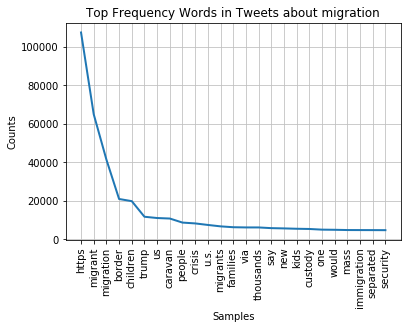

In [8]:
# Plot the term frequency graph:
word_freq.plot(25, title="Top Frequency Words in Tweets about migration")

### Comments:
- We can see that the Zipf's law holds here. The word frequency of the second most common word 'migrant' is roughly half of the word frequency of the most common word 'https'. On a side note, "https" could also be added to the custom_stopwords list.
- A very high frequency of https implies that a big chunk of tweets involve/share a URL link.
- 'migrant' and 'migration' being the next two commmon isn't a surprise since the Twitter dataset was calculated based on these keywords!
- An interesting thing to note here is that the top frequency words appearing in tweets about migration include words like 'border', 'Trump', 'US', 'families' since a majoirty of the tweets in our dataset were from the US and UK.
- Another parallel analysis (not shown here) revealed that #BuildTheWall was the second most commonly tweeted hashtag in our dataset (after #migration).

# fin.